# HW1

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

### 1.資料探索 (10%)

##### a.將特徵按字母順序排序。然後繪製特徵之間的相關性熱圖（提示：這將是一個21×21的矩陣）(2%)。您會注意到對角線元素始終為1，請解釋這種現象的原因(2%)。

Text(0.5, 1.0, 'Feature Correlation Heatmap')

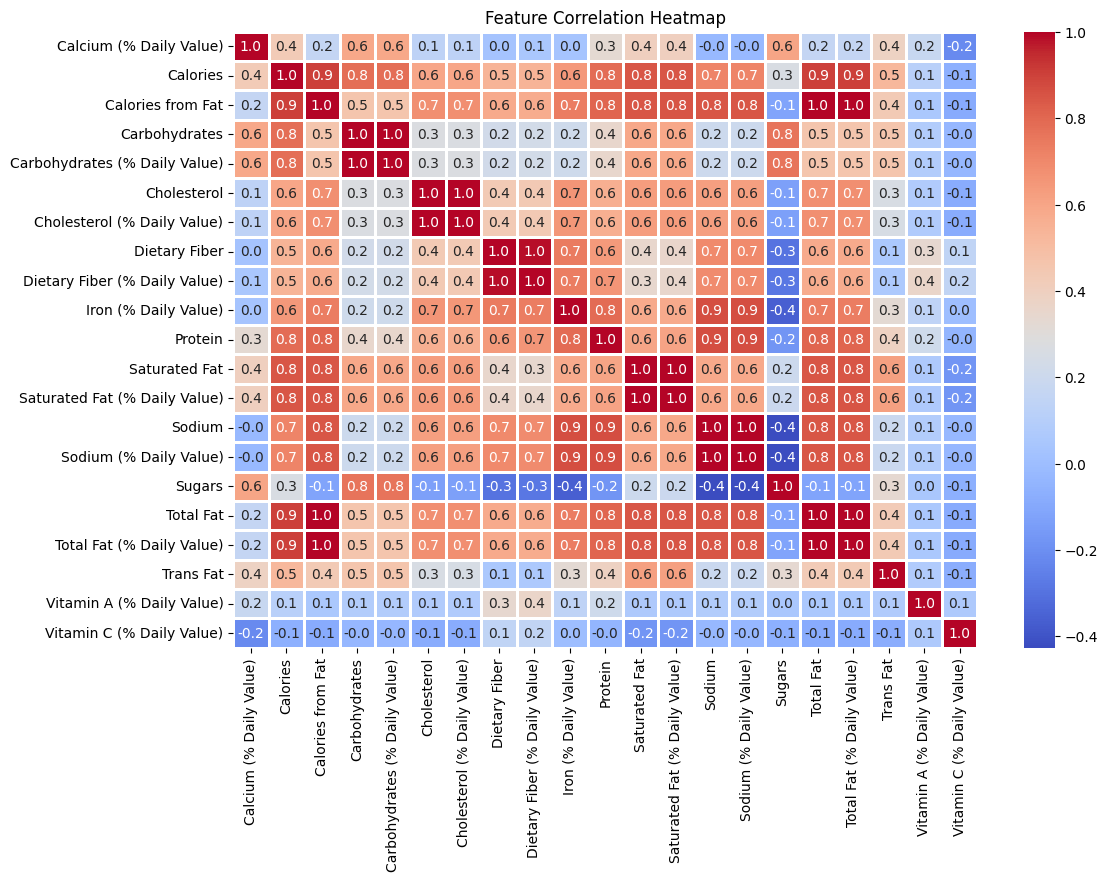

In [39]:
df =pd.read_csv("menu.csv")
df=df.iloc[:,3:]
#print(df) 測試df輸出
#特徵排序
df = df[sorted(df.columns)]
# 計算特徵之間的相關係數矩陣
corrMatrix = df.corr()
# 設定圖形大小
plt.figure(figsize=(12, 8))
# 繪製熱力圖
sns.heatmap(corrMatrix, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.8)
# 設定圖形標題
plt.title("Feature Correlation Heatmap")

##### b.列出與卡路里有第二和第三大正相關的特徵(2%)。注意：如果遇到多個特徵實際上表示相同的事物，只列出與卡路里相關性最大的特徵。例如，如果看到鈉含量和鈉含量（每日值百分比），且前者與卡路里的相關性較大，則只列出鈉含量。

In [ ]:
#print(corrMatrix['Calories'])
#排序carolies相關係數的大小
Calories=corrMatrix['Calories'].sort_values(ascending=False)
#print(Calories)
print(f"第二大特徵:{Calories.index[1]}")
print(f"第三大特徵:{Calories.index[2]}")


第二大特徵:Calories from Fat
第三大特徵:Total Fat


##### c.為1(b)中發現的所有特徵繪製「特徵vs卡路里」的散點圖(2%)。

In [ ]:
sns.scatterplot(x=df[Calories.index[1]],y=df["Calories"])
plt.title(f"Scatter plot : {Calories.index[1]} vs Calories")
plt.xlabel(Calories.index[1])
plt.ylabel("Calories")
plt.show()

sns.scatterplot(x=df[Calories.index[2]],y=df["Calories"])
plt.title(f"Scatter plot : {Calories.index[2]} vs Calories")
plt.xlabel(Calories.index[2])
plt.ylabel("Calories")
plt.show

##### d.為卡路里、總脂肪、蛋白質和碳水化合物特徵繪製箱形圖(2%)。

In [ ]:
feature=['Calories','Total Fat','Protein','Carbohydrates']
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[feature])
plt.title('Boxplot of Calories, Total Fat, Protein, and Carbohydrates')
plt.show()

### 2.資料預處理 (10%)

##### a.報告所有數值特徵的中位數和標準差(2%)。

In [85]:
median=df.median()
print(f"Median of all feature:\n{median}\n")
std=df.std()
print(f"Std of all feature:\n{std}")

Median of all feature:
Calcium (% Daily Value)           20.0
Calories                         340.0
Calories from Fat                100.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Cholesterol                       30.0
Cholesterol (% Daily Value)       10.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Iron (% Daily Value)               4.0
Protein                           12.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Sugars                            17.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Trans Fat                          0.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
dtype: float64

Std of all feature:
Calcium (% Daily Value)           17.019953
Calories                         204.383042
Calories from Fat                1

##### b.編寫程式碼，將(3a)中所有數值特徵的離群值替換為NaN(2%)。（提示：使用3個標準差偏差來找出離群值）。報告每個特徵對應的NaN總數(1%)。

In [82]:
df_2b=df
for column in df_2b.columns:
    mean=df_2b[column].mean()
    Std=df_2b[column].std()
    outliers=(df_2b[column]-mean).abs()>3*Std
    df_2b[column][outliers]=np.nan
nanCounts = df_2b.isna().sum()
print("\nNumber of NaN values for each feature after replacing outliers:\n", nanCounts)


Number of NaN values for each feature after replacing outliers:
 Calcium (% Daily Value)           0
Calories                          5
Calories from Fat                 7
Carbohydrates                     5
Carbohydrates (% Daily Value)     5
Cholesterol                      19
Cholesterol (% Daily Value)      19
Dietary Fiber                     8
Dietary Fiber (% Daily Value)     5
Iron (% Daily Value)              3
Protein                           3
Saturated Fat                     0
Saturated Fat (% Daily Value)     0
Sodium                            5
Sodium (% Daily Value)            5
Sugars                            4
Total Fat                         7
Total Fat (% Daily Value)         7
Trans Fat                         9
Vitamin A (% Daily Value)        17
Vitamin C (% Daily Value)        34
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_14944\3360839378.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_2b[column][outliers]=np.nan
C:\Users\user\AppData\Local\Temp\ipykernel_14944\3360839378.py:6: SettingWithCopyWarning: 
A value

##### c.接續(3b)，編寫程式碼將缺失值（NaN）替換為平均值(2%)。報告中位數和標準差(1%)。將結果與(3a)比較，並用一句話解釋您的發現(2%)。

In [84]:
df_3c=df_2b.fillna(df.mean())
median_3c=df_3c.median()
std_3c=df_3c.std()
print("\nMedian after replacing NaN with mean:\n", median_3c.round(2))
print("\nStandard deviation after replacing NaN with mean:\n", std_3c.round(2))
    


Median after replacing NaN with mean:
 Calcium (% Daily Value)           20.00
Calories                         340.00
Calories from Fat                100.00
Carbohydrates                     44.00
Carbohydrates (% Daily Value)     15.00
Cholesterol                       34.25
Cholesterol (% Daily Value)       11.00
Dietary Fiber                      1.00
Dietary Fiber (% Daily Value)      5.00
Iron (% Daily Value)               4.00
Protein                           12.00
Saturated Fat                      5.00
Saturated Fat (% Daily Value)     24.00
Sodium                           190.00
Sodium (% Daily Value)             8.00
Sugars                            17.50
Total Fat                         11.00
Total Fat (% Daily Value)         17.00
Trans Fat                          0.00
Vitamin A (% Daily Value)          8.00
Vitamin C (% Daily Value)          0.00
dtype: float64

Standard deviation after replacing NaN with mean:
 Calcium (% Daily Value)           17.02
Calories     

### 3.線性迴歸 (20%)注意：請使用原始資料集（即未經過問題2預處理步驟的資料集）進行此問題。

##### a.使用所有資料訓練一個線性預測器來預測卡路里，如下所示(5%)： <br> 卡路里 = b + w₁ × [總脂肪] + w₂ × [蛋白質] + w₃ × [碳水化合物] <br> 報告b、w₁、w₂和w₃的值(2%)。解釋它們在現實世界中的含義(3%)。

In [96]:
df =pd.read_csv("menu.csv")
df=df.iloc[:,3:]

In [100]:
X=df[['Total Fat', 'Protein', 'Carbohydrates']]
Y=df[['Calories']]

model=LinearRegression()

model.fit(X,Y)

b=model.intercept_
w=model.coef_

print(f"截距 b: {b[0]:.2f}")
print(f"總脂肪的權重 w₁: {w[0][0]:.2f}")
print(f"蛋白質的權重 w₂: {w[0][1]:.2f}")
print(f"碳水化合物的權重 w₃: {w[0][2]:.2f}")

截距 b: -1.83
總脂肪的權重 w₁: 9.02
蛋白質的權重 w₂: 4.05
碳水化合物的權重 w₃: 3.98


##### b. 使用所有資料訓練另一個線性預測器來預測卡路里，如下所示(5%)：<br>卡路里 = b + w₁ × [總脂肪]<br> 報告b和w₁的值(2%)。請注意，即使兩者都是權重相同的特徵（總脂肪），w₁的值可能與3(b)的結果不同。請解釋這種差異(3%)。

In [101]:
X=df[['Total Fat']]
Y=df[['Calories']]

model=LinearRegression()

model.fit(X,Y)

b=model.intercept_
w=model.coef_

print(f"截距 b: {b[0]:.2f}")
print(f"總脂肪的權重 w₁: {w[0][0]:.2f}")

截距 b: 151.59
總脂肪的權重 w₁: 15.30


### 4.邏輯迴歸 (25%)注意：同樣使用原始資料集。

##### a.計算卡路里的中位數。通過將卡路里高於中位數的每個項目指定為1，其他指定為0來生成二元分類標籤。例如，如果中位數為500，由於「熱蛋糕和香腸」的卡路里為520，因此被指定為1。「香腸麥滿分」的卡路里為300，因此被指定為0。報告中位數以及分別標記為1和0的項目數量(3%)。

##### b. 根據檔案中出現的順序將資料分為兩部分：90%用於訓練，10%用於測試。在訓練資料上訓練邏輯迴歸，以分類卡路里是否高於中位數(5%)：<br>標籤 = σ(b + w₁ × [總脂肪] + w₂ × [蛋白質] + w₃ × [碳水化合物])<br>根據預測結果繪製混淆矩陣(2%)。報告預測結果的準確率、精確率、召回率和F1分數(2%)。

##### c.使用4(b)中相同的資料分割，在訓練資料和所有21個特徵上訓練邏輯迴歸，以分類卡路里是否高於中位數(5%)：<br>標籤 = σ(b + Σ∀j wj × xj)<br>根據預測結果繪製混淆矩陣(2%)。報告預測結果的準確率、精確率、召回率和F1分數(2%)。

##### d.報告4(b)和4(c)的訓練損失和測試損失(2%)。比較這些結果，哪個可能是更好的模型？解釋您的決定(2%)。

### 5.交叉驗證 (15%)注意：對於此問題，首先打亂原始資料。將打亂後的資料分為兩部分：90%用於訓練，10%用於測試。

##### a.在訓練資料中，編寫程式碼以使用與4(c)相同的公式進行5折交叉驗證(5%)。通過填寫下表報告訓練和驗證損失(4%)。根據表格解釋哪個模型可能具有最佳泛化能力(3%)。（提示：呈現時，根據訓練損失降序排列折數）

##### b.將5(a)中確定的最具泛化能力的模型應用於測試資料後，它是否比4(c)中的模型具有更好的準確率？解釋為什麼或為什麼不(3%)。

### 6.正則化 (20%)注意：對於此問題，首先打亂原始資料。將打亂後的資料分為兩部分：90%用於訓練，10%用於測試。

##### a.  嶺迴歸：編寫程式碼為4(c)中的二元分類器添加L2範數正則化項，如下所示(4%)：<br>Loss^{RR} = Σloss(yi-σ(b + Σ∀j wj × xj)) + λ₂ × Σ∀j wj²<br>根據訓練損失和驗證損失繪製學習曲線，以選擇超參數λ₂，範圍為{0.01, 0.1, 1, 10, 100, 1000}。對於每個λ₂值，使用5折平均訓練損失（和驗證損失）來表示此性能。報告圖表、最佳λ₂，以及使用最佳λ₂在測試資料上的準確率(3%)。

##### b.  Lasso迴歸：編寫程式碼為4(c)中的二元分類器添加L1範數正則化項，如下所示(4%)：<br>Loss^{LR} = Σloss(yi-σ(b + Σ∀j wj × xj)) + λ₁ × Σ∀j |wj|<br>重複6(a)中關於λ₁的學習曲線繪製過程。報告圖表、最佳λ₁，以及使用最佳λ₁在測試資料上的準確率(3%)。此外，報告在保持相同預測結果的情況下，使用Lasso迴歸可以從訓練過程中排除多少特徵？解釋您如何找到這個數字(2%)。

##### c.  比較5(b)、6(a)和6(b)獲得的結果，哪個產生最佳準確率，為什麼(4%)？